<a href="https://colab.research.google.com/github/ColinSidberry/intro-to-ml-linear-alg-calc/blob/main/Part1-Problems/problems/01_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1: Feature Engineering - Designing the Model's "Sensors"

## Learning Objectives
By the end of this problem, you will:
- Understand what features are and why they matter
- Design multiple feature sets for sentiment classification
- See how feature choices affect model performance
- Connect feature engineering to the broader ML pipeline

## Task Overview

1. **Understanding Baseline Features** - Examine our starting feature set
2. **Design Your Own Feature Sets** - Create 5 different feature engineering approaches
3. **Evaluate Feature Performance** - Compare separability and effectiveness
4. **Visualization Analysis** - See how features separate classes in 2D space
5. **Handle Edge Cases** - Solve the "Love the fins!" nickname challenge
6. **Feature Engineering Insights** - Explore trade-offs (exclamation marks)
7. **Reflection and Next Steps** - Connect to the bigger ML picture

---

## The Story So Far

You want to build a sentiment classifier for sports tweets. When someone tweets "Go Dolphins!", you want your model to recognize it as positive sentiment. When they tweet "Terrible game", you want it to recognize negative sentiment.

But here's the fundamental challenge: **computers work with numbers, not words**.

Your neural network can't directly process "Go Dolphins!" - it needs numbers it can multiply, add, and optimize. Features are the bridge between human language and mathematical computation.

## What Are Features?

**Features are the model's sensors** - measurable properties that capture important aspects of your data.

Think of them like this:
- A doctor uses sensors: blood pressure, temperature, heart rate
- A weather app uses sensors: temperature, humidity, wind speed
- Your sentiment classifier uses features: word count, exclamation marks, team mentions

**The key insight**: Your model can only learn from what it can "see" through its features. Choose them wisely!

In [1]:
!git clone https://github.com/ColinSidberry/intro-to-ml-linear-alg-calc.git
%cd intro-to-ml-linear-alg-calc

Cloning into 'intro-to-ml-linear-alg-calc'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 35 (delta 5), reused 35 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 517.51 KiB | 3.75 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/intro-to-ml-linear-alg-calc


In [2]:
# Setup and imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List
import re

# Import our custom utilities
import sys
sys.path.append('./utils')
from data_generators import load_sports_dataset, create_sports_tweets_features
from visualization import plot_feature_space_2d

# Load the dataset
features, labels, feature_names, texts = load_sports_dataset()

print("Loaded dataset:")
print(f"Features shape: {features.shape}")
print(f"Feature names: {feature_names}")
print(f"Sample texts: {texts[:3]}")

Loaded dataset:
Features shape: (16, 3)
Feature names: ['word_count', 'has_team', 'has_exclamation']
Sample texts: ['Go Dolphins!', 'Terrible game', 'Love the fins!']


## Task 1: Understanding the Baseline Features

Let's examine our starting feature set: `[word_count, has_team, has_exclamation]`

In [3]:
# Examine the baseline features for our key example
go_dolphins_text = "Go Dolphins!"
go_dolphins_features = create_sports_tweets_features(go_dolphins_text)

print(f"Text: '{go_dolphins_text}'")
print("Features:")
for name, value in go_dolphins_features.items():
    print(f"  {name}: {value}")

print("\nFeature Vector: [{}]".format(", ".join(str(v) for v in go_dolphins_features.values())))

Text: 'Go Dolphins!'
Features:
  word_count: 2
  has_team: 1.0
  has_exclamation: 1.0

Feature Vector: [2, 1.0, 1.0]


In [4]:
# Let's see how all tweets in our dataset map to feature space
df = pd.DataFrame(features, columns=feature_names)
df['sentiment'] = ['Positive' if label == 1 else 'Negative' for label in labels]
df['text'] = texts

print("Feature values for all tweets:")
print(df.head(10))

Feature values for all tweets:
   word_count  has_team  has_exclamation sentiment                      text
0         2.0       1.0              1.0  Positive              Go Dolphins!
1         2.0       0.0              0.0  Negative             Terrible game
2         3.0       1.0              1.0  Positive            Love the fins!
3         2.0       0.0              0.0  Negative              Bad coaching
4         2.0       0.0              1.0  Positive               Great win!!
5         3.0       0.0              0.0  Negative            Hate this team
6         2.0       0.0              1.0  Positive        Amazing touchdown!
7         3.0       0.0              0.0  Negative         Worst season ever
8         3.0       1.0              1.0  Positive  Dolphins are incredible!
9         3.0       0.0              0.0  Negative           This team sucks


**🤔 Reflection Questions:**
1. Do you see any patterns in how positive vs negative tweets differ?
2. Are there tweets that might be hard to classify with these features?
3. What information is our current feature set missing?

## Task 2: Design Your Own Feature Sets

Now it's your turn! Design 5 different feature sets that might capture sentiment better than our baseline.

**Some ideas to consider:**
- `has_negative_words`: Does the tweet contain words like "bad", "terrible", "awful"?
- `word_length_avg`: Average length of words (excited tweets might use longer words)
- `has_superlatives`: Contains "best", "worst", "amazing", "terrible"?
- `capitalization_ratio`: Fraction of characters that are uppercase
- `punctuation_count`: Total number of punctuation marks

**Your challenge**: Implement each feature set and see how it performs!

In [ ]:
def feature_set_1_emotional_words(text: str) -> Dict[str, float]:
    """
    Feature Set 1: Focus on emotional words

    TODO: Implement features that capture emotional language
    """
    text_lower = text.lower()

    # Positive emotional words
    positive_words = ['amazing', 'great', 'love', 'best', 'incredible', 'fantastic', 'awesome']

    # Negative emotional words
    negative_words = ['terrible', 'bad', 'awful', 'worst', 'hate', 'horrible', 'disappointing']

    # TODO: Count positive and negative words
    # TODO: Calculate emotional intensity (ratio of emotional words to total words)

    features = {
        'positive_word_count': 0,  # Replace with your implementation
        'negative_word_count': 0,  # Replace with your implementation
        'emotional_intensity': 0,  # Replace with your implementation
    }

    return features

# Test your implementation
test_text = "Amazing game! Love the Dolphins!"
result = feature_set_1_emotional_words(test_text)
print(f"Text: '{test_text}'")
print(f"Features: {result}")

Text: 'Amazing game! Love the Dolphins!'
Features: {'positive_word_count': 0, 'negative_word_count': 0, 'emotional_intensity': 0}


In [ ]:
def feature_set_2_text_style(text: str) -> Dict[str, float]:
    """
    Feature Set 2: Focus on text style and formatting

    TODO: Implement features that capture how text is written
    """

    # TODO: Calculate capitalization ratio
    # TODO: Count total punctuation marks
    # TODO: Calculate average word length
    # TODO: Check for repeated punctuation (!!!, ???)

    features = {
        'capitalization_ratio': 0,    # Replace with your implementation
        'punctuation_count': 0,       # Replace with your implementation
        'avg_word_length': 0,         # Replace with your implementation
        'has_repeated_punctuation': 0, # Replace with your implementation
    }

    return features

# Test your implementation
test_text = "AMAZING GAME!!!"
result = feature_set_2_text_style(test_text)
print(f"Text: '{test_text}'")
print(f"Features: {result}")

Text: 'AMAZING GAME!!!'
Features: {'capitalization_ratio': 0, 'punctuation_count': 0, 'avg_word_length': 0, 'has_repeated_punctuation': 0}


In [ ]:
# TODO: Implement 3 more feature sets
# Feature Set 3: Domain-specific (sports terms, team names, etc.)
# Feature Set 4: Linguistic patterns (negation, comparatives, etc.)
# Feature Set 5: Your creative idea!

def feature_set_3_sports_domain(text: str) -> Dict[str, float]:
    """Your implementation here"""
    return {'placeholder': 0}

def feature_set_4_linguistic(text: str) -> Dict[str, float]:
    """Your implementation here"""
    return {'placeholder': 0}

def feature_set_5_creative(text: str) -> Dict[str, float]:
    """Your creative feature set - surprise us!"""
    return {'placeholder': 0}

## Task 3: Evaluate Your Feature Sets

Now let's see how well each feature set separates positive from negative tweets.

In [ ]:
# Apply each feature set to all tweets
feature_sets = {
    'Baseline': create_sports_tweets_features,
    'Emotional Words': feature_set_1_emotional_words,
    'Text Style': feature_set_2_text_style,
    'Sports Domain': feature_set_3_sports_domain,
    'Linguistic': feature_set_4_linguistic,
    'Creative': feature_set_5_creative,
}

# For each feature set, calculate separability
results = {}

for name, feature_func in feature_sets.items():
    print(f"\nEvaluating {name} feature set...")

    # Extract features for all tweets
    feature_dicts = [feature_func(text) for text in texts]

    if len(feature_dicts[0]) == 0:
        print("  Skipping - no features implemented")
        continue

    # Convert to arrays
    feature_names_set = list(feature_dicts[0].keys())
    features_array = np.array([[d[fname] for fname in feature_names_set] for d in feature_dicts])

    # Calculate mean features for positive and negative classes
    pos_mask = labels == 1
    neg_mask = labels == 0

    pos_mean = features_array[pos_mask].mean(axis=0)
    neg_mean = features_array[neg_mask].mean(axis=0)

    # Calculate separability (distance between class means)
    separability = np.linalg.norm(pos_mean - neg_mean)

    results[name] = {
        'features': features_array,
        'feature_names': feature_names_set,
        'separability': separability,
        'pos_mean': pos_mean,
        'neg_mean': neg_mean
    }

    print(f"  Separability score: {separability:.3f}")
    print(f"  Positive class mean: {pos_mean}")
    print(f"  Negative class mean: {neg_mean}")


Evaluating Baseline feature set...
  Separability score: 1.125
  Positive class mean: [2.625 0.5   1.   ]
  Negative class mean: [2.5 0.  0. ]

Evaluating Emotional Words feature set...
  Separability score: 0.000
  Positive class mean: [0. 0. 0.]
  Negative class mean: [0. 0. 0.]

Evaluating Text Style feature set...
  Separability score: 0.000
  Positive class mean: [0. 0. 0. 0.]
  Negative class mean: [0. 0. 0. 0.]

Evaluating Sports Domain feature set...
  Separability score: 0.000
  Positive class mean: [0.]
  Negative class mean: [0.]

Evaluating Linguistic feature set...
  Separability score: 0.000
  Positive class mean: [0.]
  Negative class mean: [0.]

Evaluating Creative feature set...
  Separability score: 0.000
  Positive class mean: [0.]
  Negative class mean: [0.]


## Task 4: Visualize Feature Spaces

Let's visualize how well different feature sets separate the classes.

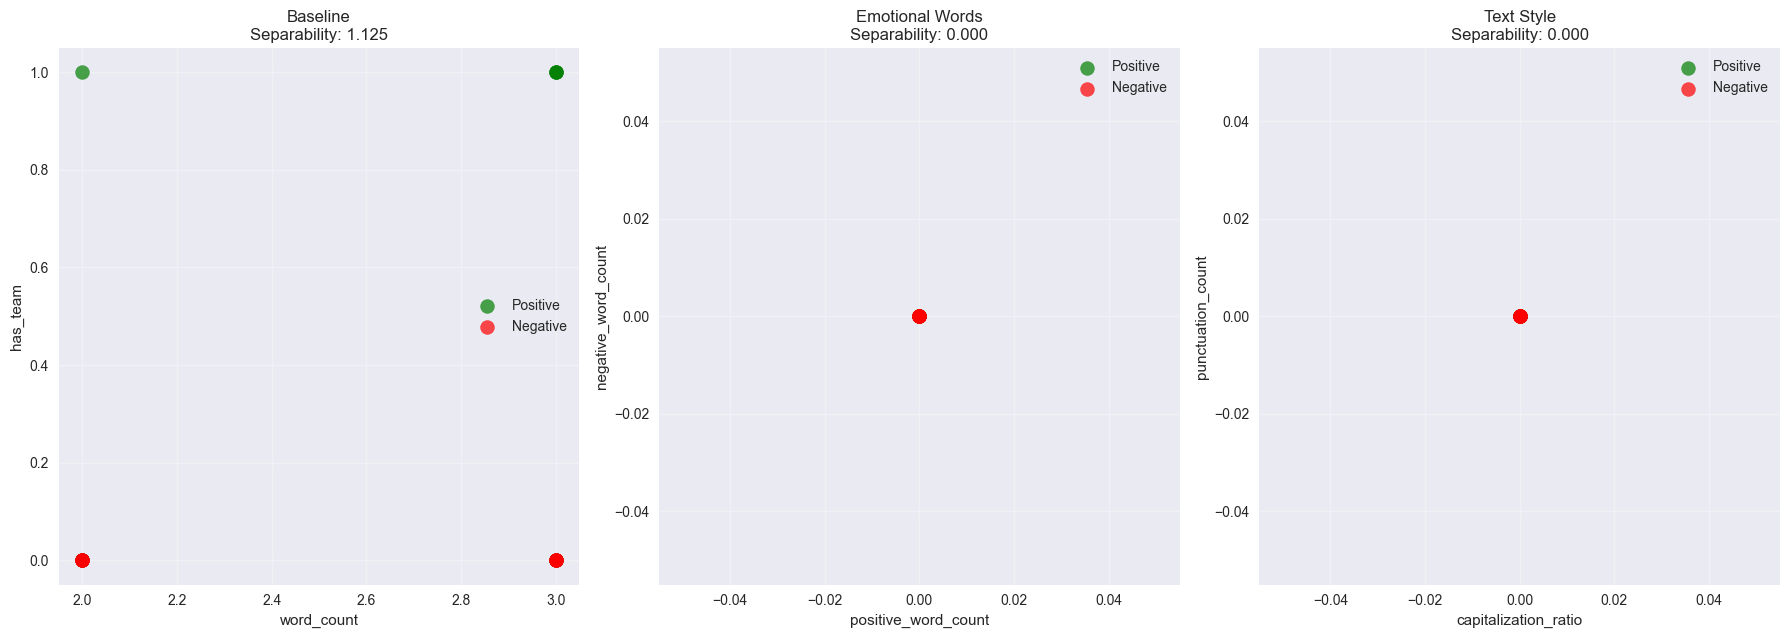

In [ ]:
# Create visualizations for feature sets with 2+ features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

plot_idx = 0
for name, result in results.items():
    if len(result['feature_names']) >= 2 and plot_idx < 6:
        # Use first two features for 2D visualization
        features_2d = result['features'][:, :2]
        feature_names_2d = result['feature_names'][:2]

        ax = axes[plot_idx]

        # Plot positive and negative examples
        pos_mask = labels == 1
        neg_mask = labels == 0

        ax.scatter(features_2d[pos_mask, 0], features_2d[pos_mask, 1],
                  c='green', label='Positive', alpha=0.7, s=100)
        ax.scatter(features_2d[neg_mask, 0], features_2d[neg_mask, 1],
                  c='red', label='Negative', alpha=0.7, s=100)

        ax.set_xlabel(feature_names_2d[0])
        ax.set_ylabel(feature_names_2d[1])
        ax.set_title(f'{name}\nSeparability: {result["separability"]:.3f}')
        ax.legend()
        ax.grid(True, alpha=0.3)

        plot_idx += 1

# Hide unused subplots
for i in range(plot_idx, 6):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## Task 5: The "Love the fins!" Challenge

Here's a specific challenge from the problem set: How do you handle "Love the fins!" where "fins" is a nickname for "Dolphins"?

In [ ]:
# Test different approaches to the nickname problem
test_cases = [
    "Go Dolphins!",
    "Love the fins!",
    "Miami is awesome!",
    "Go team!"
]

def improved_team_detection(text: str) -> Dict[str, float]:
    """
    TODO: Implement better team detection that handles:
    - Official names: "Dolphins", "Miami"
    - Nicknames: "fins", "phins"
    - Generic terms: "team"
    """
    text_lower = text.lower()

    # TODO: Create comprehensive team detection
    team_terms = []  # Add your team terms here

    features = {
        'has_team_official': 0,    # Official team names
        'has_team_nickname': 0,    # Nicknames and slang
        'has_team_generic': 0,     # Generic terms like "team"
        'team_confidence': 0,      # How confident are we this mentions the team?
    }

    return features

# Test your implementation
for text in test_cases:
    features = improved_team_detection(text)
    print(f"'{text}': {features}")

'Go Dolphins!': {'has_team_official': 0, 'has_team_nickname': 0, 'has_team_generic': 0, 'team_confidence': 0}
'Love the fins!': {'has_team_official': 0, 'has_team_nickname': 0, 'has_team_generic': 0, 'team_confidence': 0}
'Miami is awesome!': {'has_team_official': 0, 'has_team_nickname': 0, 'has_team_generic': 0, 'team_confidence': 0}
'Go team!': {'has_team_official': 0, 'has_team_nickname': 0, 'has_team_generic': 0, 'team_confidence': 0}


## Task 6: Feature Engineering Insights

Let's explore some of the fundamental trade-offs in feature engineering.

In [ ]:
# Compare different approaches to handling exclamation marks
test_texts = [
    "Go Dolphins",
    "Go Dolphins!",
    "Go Dolphins!!",
    "Go Dolphins!!!!!!"
]

def compare_exclamation_features(text: str) -> Dict[str, float]:
    """
    Compare different ways to handle exclamation marks
    """
    features = {
        'has_exclamation_binary': 1.0 if '!' in text else 0.0,
        'exclamation_count': text.count('!'),
        'exclamation_ratio': text.count('!') / len(text),
        'exclamation_capped': min(text.count('!'), 3),  # Cap at 3
        'exclamation_log': np.log1p(text.count('!')),   # Log transform
    }

    return features

print("Different approaches to exclamation mark features:")
for text in test_texts:
    features = compare_exclamation_features(text)
    print(f"'{text}':")
    for name, value in features.items():
        print(f"  {name}: {value:.3f}")
    print()

Different approaches to exclamation mark features:
'Go Dolphins':
  has_exclamation_binary: 0.000
  exclamation_count: 0.000
  exclamation_ratio: 0.000
  exclamation_capped: 0.000
  exclamation_log: 0.000

'Go Dolphins!':
  has_exclamation_binary: 1.000
  exclamation_count: 1.000
  exclamation_ratio: 0.083
  exclamation_capped: 1.000
  exclamation_log: 0.693

'Go Dolphins!!':
  has_exclamation_binary: 1.000
  exclamation_count: 2.000
  exclamation_ratio: 0.154
  exclamation_capped: 2.000
  exclamation_log: 1.099

'Go Dolphins!!!!!!':
  has_exclamation_binary: 1.000
  exclamation_count: 6.000
  exclamation_ratio: 0.353
  exclamation_capped: 3.000
  exclamation_log: 1.946



## Task 7: Reflection and Next Steps

**🤔 Critical Thinking Questions:**

1. **Which feature set worked best and why?**
   - Look at the separability scores
   - Consider the visualizations
   - Think about what patterns each feature set captures

2. **What are the limitations of your features?**
   - What examples would they misclassify?
   - What information are they missing?
   - How might they fail on new data?

3. **How do features connect to the bigger picture?**
   - Features become the input to mathematical operations (dot products!)
   - The model will learn weights for each feature
   - Better features make the model's job easier

**Write your reflections here:**

*Your reflection goes here...*

## What's Next?

You've now seen how raw text becomes numbers through feature engineering. These feature vectors will become the input to the mathematical operations we'll explore in Problem 2: Dot Products.

**Coming up:**
- **Problem 2**: How dot products turn your features into predictions
- **Problem 3**: How loss functions measure prediction quality  
- **Problem 4**: How gradient descent learns optimal weights
- **Problem 5**: How matrix operations scale to real datasets

**Key Takeaway**: Features are the model's "sensors" - they determine what patterns the model can possibly learn. Choose them thoughtfully!

## Extension Challenges

Ready for more? Try these advanced challenges:

1. **Emoji Analysis**: Create features that detect and interpret emoji sentiment
2. **Negation Handling**: Build features that understand "not bad" vs "bad"
3. **Context Windows**: Create features that look at word pairs or triplets
4. **Statistical Features**: Use TF-IDF or word frequency statistics
5. **Domain Adaptation**: Test your features on tweets about other sports teams

In [ ]:
# Setup and imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List
import re

# Import our custom utilities
import sys
sys.path.append('../../utils')
from data_generators import load_sports_dataset, create_sports_tweets_features
from visualization import plot_feature_space_2d

# Load the dataset
features, labels, feature_names, texts = load_sports_dataset()

print("Loaded dataset:")
print(f"Features shape: {features.shape}")
print(f"Feature names: {feature_names}")
print(f"Sample texts: {texts[:3]}")

Loaded dataset:
Features shape: (16, 3)
Feature names: ['word_count', 'has_team', 'has_exclamation']
Sample texts: ['Go Dolphins!', 'Terrible game', 'Love the fins!']


In [ ]:
# Check the correct path to utils
import os
print("Current working directory:", os.getcwd())
print("Contents of current directory:", os.listdir('.'))
print("Contents of utils directory:", os.listdir('./utils'))

Current working directory: /Users/colinsidberry/Northeastern/NLP/2-Intro_to_ML,Linear_Alg,Calc
Contents of current directory: ['requirements.txt', 'Part1-Problems', 'tests', '.claude', 'utils', 'docs', 'README.md', 'venv', 'Part2-Problems']
Contents of utils directory: ['gradient_helpers.py', '__pycache__', 'visualization.py', 'data_generators.py']


In [ ]:
# Setup and imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List
import re

# Import our custom utilities
import sys
sys.path.append('./utils')
from data_generators import load_sports_dataset, create_sports_tweets_features
from visualization import plot_feature_space_2d

# Load the dataset
features, labels, feature_names, texts = load_sports_dataset()

print("Loaded dataset:")
print(f"Features shape: {features.shape}")
print(f"Feature names: {feature_names}")
print(f"Sample texts: {texts[:3]}")

Loaded dataset:
Features shape: (16, 3)
Feature names: ['word_count', 'has_team', 'has_exclamation']
Sample texts: ['Go Dolphins!', 'Terrible game', 'Love the fins!']
